Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-06 02:31:08--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.2MB/s    in 13s     

2019-11-06 02:31:22 (14.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
top_10_prods = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado',
                'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

In [0]:
# Aisle CSV

df_aisles = pd.read_csv('aisles.csv')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# Departments CSV

df_departments = pd.read_csv('departments.csv')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# order_products__prior.csv

df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
# order_products__train.csv

df_order_products_train = pd.read_csv('order_products__train.csv')
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
# Orders.csv

df_orders = pd.read_csv('orders.csv')
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
# Products.csv

df_products = pd.read_csv('products.csv')
df_products.sample(10)

,product_id,product_name,aisle_id,department_id
6461,6462,Fava Beans,83,4
19625,19626,Baby Brussel Sprouts,123,4
30920,30921,Jumbo Grade A White Eggs,86,16
10481,10482,Beyond Chicken Lightly Seasoned Strips,14,20
37923,37924,Original Family Pack Potato Chips,107,19
7236,7237,Ocean Middles Cat Treats Salmon & Tuna,41,8
31013,31014,Hydro Queen Plunger,87,17
7923,7924,Coconut Chocolate Protein Bar,100,21
12850,12851,Coconut Cookies,61,19
19333,19334,Essential Antioxidants Original 100% Vegetable...,98,7


In [11]:
# Merge the ordered products of the prior and train set to get full set

df_order_products_concat = pd.concat([df_order_products_prior, df_order_products_train])
print(df_order_products_concat.head())
print(df_order_products_concat.shape)


   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
(33819106, 4)


Columns I will need:

1. product_id
2. product_name
3. order_id
4. order_number

Dataframes needed:

1. order_products__prior.csv
2. order_products__train.csv
3. products.csv
4. orders.csv

In [13]:
# Subset order.csv

df_orders.shape

(3421083, 7)

In [14]:
df_orders.columns # Need order_id, order_number

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [15]:
orders_clean = df_orders[['order_id', 'order_number']]
orders_clean.head()

,order_id,order_number
0,2539329,1
1,2398795,2
2,473747,3
3,2254736,4
4,431534,5


In [28]:
# Subset df_order_products_concat to remove re-order column

order_products = df_order_products_concat[['order_id', 'product_id']]
order_products.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [26]:
# Subset products.csv

print(df_products.columns)
print(df_products.shape)

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
(49688, 4)


In [27]:
products = df_products[df_products['product_name'].isin(top_10_prods)]
print(products.head())
print(products.shape)

       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
16796       16797            Strawberries        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
(10, 4)


In [29]:
# Merge them together

final_top_10_df = products[['product_name', 'product_id']].merge(order_products).merge(orders_clean)

(2418314, 4)

In [30]:
print(final_top_10_df.shape)
final_top_10_df.head()

(2418314, 4)


,product_name,product_id,order_id,order_number
0,Bag of Organic Bananas,13176,5,42
1,Organic Hass Avocado,47209,5,42
2,Bag of Organic Bananas,13176,27,16
3,Organic Avocado,47766,27,16
4,Bag of Organic Bananas,13176,29,14


In [0]:
item_count_dict = {}

for item in final_top_10_df['product_name']:
  if item in top_10_prods and item not in item_count_dict:
    item_count_dict[item] = 1
  elif item in top_10_prods and item in item_count_dict:
    item_count_dict[item] += 1

In [32]:
for k, v in item_count_dict.items():
  print('The item: {} has been bought {} times.'.format(k, v))

The item: Bag of Organic Bananas has been bought 394930 times.
The item: Organic Hass Avocado has been bought 220877 times.
The item: Organic Avocado has been bought 184224 times.
The item: Organic Whole Milk has been bought 142813 times.
The item: Limes has been bought 146660 times.
The item: Strawberries has been bought 149445 times.
The item: Organic Baby Spinach has been bought 251705 times.
The item: Organic Strawberries has been bought 275577 times.
The item: Large Lemon has been bought 160792 times.
The item: Banana has been bought 491291 times.


## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# Replicate Lesson Code

In [35]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns = ['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [36]:
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns =['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [37]:
df3 = pd.concat([df1, df2])
df3.head()

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [38]:
df4 = pd.concat([df1, df2], axis = 1)
df4.head()

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [0]:
# Merging
stock_name = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
                         'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})

In [0]:
open_price = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 
                           'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})

In [49]:
named_stocks = stock_name.merge(open_price, on = 'Symbol')
named_stocks.head()

,Symbol,Name,OpenPrice
0,AMZN,Amazon,1703.34
1,MSFT,Microsoft,96.54
2,FB,Facebook,51.45
3,AAPL,Apple,217.51
4,GOOGL,Google,501.30


In [51]:
wk_high = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
                       '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wk_high

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [54]:
full_stocks = named_stocks.merge(wk_high, how='outer', on = 'Symbol')
full_stocks

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN
5,NFLX,NaN,NaN,303.22


In [0]:
my_index=['John Smith', 'Jane Doe', 'Mary Johnson']
my_columns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame([[np.NaN, 2],
                       [16,11],
                       [3,1]],
                      columns = my_columns,
                      index = my_index
                      )

In [56]:
table1 # This is wide format

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [63]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [64]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [104]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [105]:
tidy_table1 = table1.melt(id_vars = ['index'], value_vars = ['treatmenta', 'treatmentb'])
tidy_table1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [106]:
tidy_table1 = tidy_table1.rename(columns = {'index': 'name', 'variable': 'trt', 'value': 'result'})
tidy_table1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [107]:
tidy_table1['trt'] = tidy_table1['trt'].str.replace('treatment', '')
tidy_table1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [87]:
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [88]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [90]:
tidy_table2 = table2.melt(id_vars='index', value_vars= ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy_table2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [91]:
tidy_table2 = tidy_table2.rename(columns={'index': 'trt', 'variable': 'name', 'value':'result'})
tidy_table2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [108]:
tidy_table2['trt'] = tidy_table2['trt'].str.replace('treatment', '')
tidy_table2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [109]:
wide = tidy_table1.pivot_table(index = 'name', columns = 'trt', values = 'result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [110]:
wide2 = tidy_table2.pivot_table(index = 'trt', columns = 'name', values = 'result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
import seaborn as sns

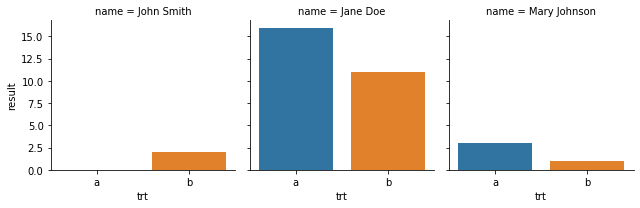

In [113]:
sns.catplot(data = tidy_table1, x = 'trt', y = 'result', col = 'name', kind = 'bar', height = 3);

In [0]:
flights = sns.load_dataset('flights')

In [0]:
##### YOUR CODE HERE #####
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights.pivot(index = 'year', columns = 'month')

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####